# One Dimensional hard spheres

In [402]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from numpy.random import random, seed
import seaborn as sns
seed(1234)

## 1. Direct Sampling

In [2]:
def directSampling(L, sigma) :
    """Sampling of 2 1D-balls of size 2*sigma, on a 1D-line of length L."""
    n = 2
    pos = np.zeros(n)
    acc = False
    while acc == False : # while overlap, try again
        # Choose the position of a ball between [sigma, L-sigma]
        pos[0] = sigma + random()*(L-2*sigma)
        pos[1] = sigma + random()*(L-2*sigma)
        if abs(pos[1] - pos[0]) >= 2*sigma : # if no overlap, keep and stop
            acc = True
    return pos

In [3]:
L, sigma=8, 0.75
H = np.array([directSampling(L, sigma) for i in range(10)])

In [42]:
def plot1(H) :
    fig, ax = plt.subplots(2,sharex=True,figsize=(6,8))
    ax[0].hist(H[:, 0], bins = 100, normed = 1, color = 'red', alpha = 0.6)
    ax[0].set_title('Position of ball 1')
    ax[0].set_ylim([0,0.25])
    ax[1].hist(H[:, 1], bins = 100, normed = 1, color = 'orange', alpha = 0.6)
    ax[1].set_title('Position of ball 2')
    ax[1].set_ylim([0,0.25])
    plt.show()

In [32]:
L, sigma = 8, 0.75
H = np.array([directSampling(L, sigma) for i in range(10**6)])

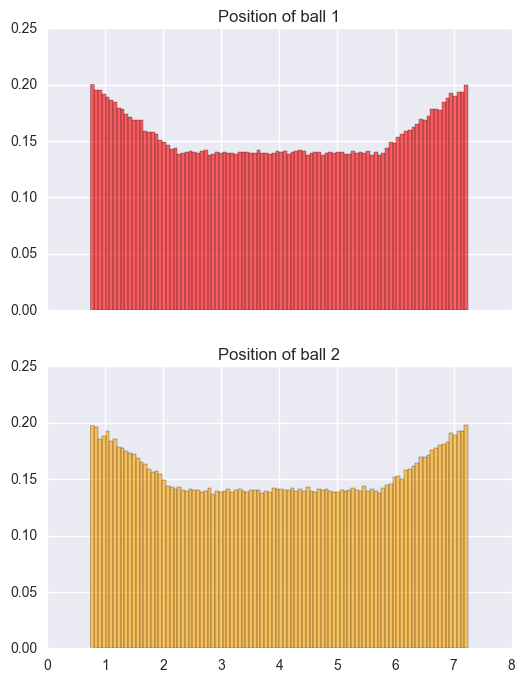

In [43]:
plot1(H)

This histogram shows the distribution of the two balls, and more especially the depletion effect on the border sides, while on the center of the histograms, we can see a plateau

## 2. A Wrong Sampling

In [7]:
def wrongSampling(L, sigma) :
    """Wrong sampling of 2 1D-balls of size 2*sigma, on a 1D-line of length L."""
    n = 2
    pos = np.zeros(n)
    pos[0] = sigma + random()*(L-2*sigma)
    acc = False
    while acc == False : # while overlap, try again
        # Choose the position of a ball between [sigma, L-sigma]
        pos[1] = sigma + random()*(L-2*sigma)
        if abs(pos[1] - pos[0]) >= 2*sigma : # if no overlap, keep and stop
            acc = True
    return pos

In [44]:
def plot2(H, W) :
    fig, ax = plt.subplots(2,sharex=True,figsize=(6,8))
    ax[0].hist(H[:, 1], bins = 100, normed = 1, color = 'red', alpha = 0.6)
    ax[0].set_title('Position of ball 2')
    ax[1].hist(W[:, 1], bins = 100, normed = 1, color = 'orange', alpha = 0.6)
    ax[1].set_title('Wrong position of ball 2')
    plt.show()

In [45]:
L, sigma = 8, 0.75
W = np.array([wrongSampling(L, sigma) for i in range(10**6)])

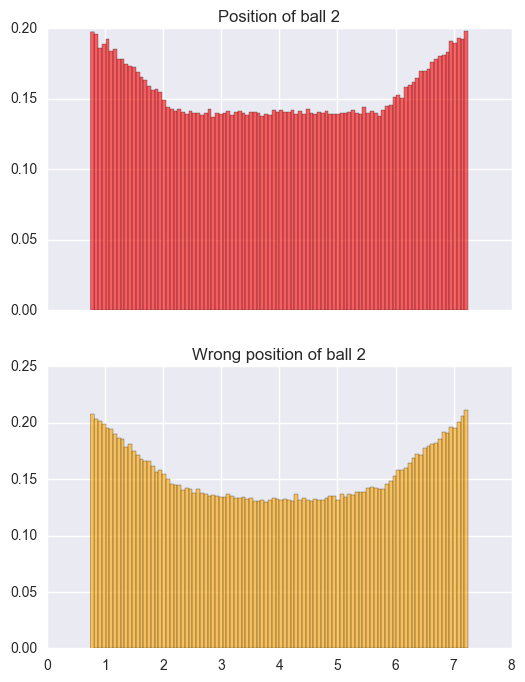

In [46]:
plot2(H, W)

## 3. A Naive Sampling

In [11]:
def naiveSampling(n, L, sigma) :
    reject = 0
    acc = False
    while acc != True :
        pos = random(size = n)*(L-2*sigma) + sigma
        x, y = np.ones((n, n))*pos, np.transpose(np.ones((n, n))*pos)
        z =  np.abs(x - y) >= 2*sigma
        np.fill_diagonal(z, True)
        if np.sum(z) == n*n :
            acc = True
        else :
            reject += 1
    return pos, reject

Here, we implemented a modified version of the given naive algorithm. Instead of comparing every step, and stop if two spheres overlap, which is very long with for loops in Python, we generate an array of positions of the spheres :
$$p = [x_{1}, ..., x_{n}]$$
then a matrix such that
$$\begin{array}{cccc}
|x_{1} - x_{1}| & |x_{1} - x_{2}| & ... & |x_{1} - x_{n}| \\
|x_{2} - x_{1}| & |x_{2} - x_{2}| & ... & |x_{2} - x_{n}| \\
\vdot & & \ddot & \vdot \\
|x_{n} - x_{1}| & |x_{n} - x_{2}| & ... & |x_{n} - x_{n}|
\end{array}$$

This matrix gives us the absolute distance between the position $x_{i}$ and $x_{j}$ for each $(i, j)$. Thus, the matrix is a symmetric matrix with zero-coefficients in the diagonal.
We then compare each of the coefficients to $2\sigma$ and return a boolean matrix (True if the coefficient is greater than $2\sigma$, i.e. : no overlap ; False else).
Finally, adding True values for the diagonal, we accept the initial distribution if and only if all the coefficients are True values, here if the sum of all booleans give $n^{2}$, the size of the matrix.
If two balls overlap, then the total sum is smaller than $n^{2}$ ad we reject the initial distribution.

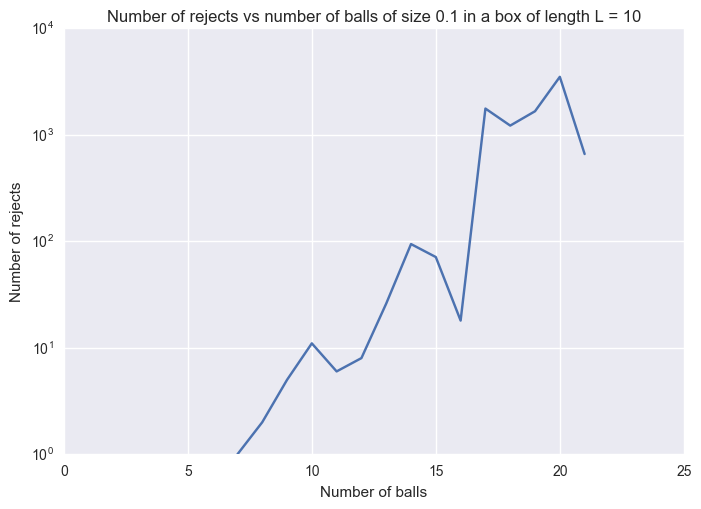

In [12]:
seed(1)
L, sigma = 10, 0.1
N = 22
dat = np.zeros(N-2)
for i in range(2, N):
    a, dat[i-2] = naiveSampling(i, L, sigma)

plt.semilogy(range(2, N), dat)
plt.xlabel('Number of balls')
plt.ylabel('Number of rejects')
plt.title('Number of rejects vs number of balls of size ' + str(sigma) + 
          ' in a box of length L = ' + str(L))
plt.show()

In the last graph, we can sometimes observe a decrease of the number of rejects, which are "lucky" configurations that converged fastly. However, the number of rejects exponentially increases.

## 4. A Clever Sampling

In [473]:
def cleverSampling(n, L, sigma):
    if (L-2*n*sigma < 0):
        print('Error: the given parameters do not allow any configuration')
        return None
    pos = random(size = n)*(L-2*n*sigma)
    pos = np.sort(pos)
    pos = pos + (2*np.array(range(0,n)) + 1)*sigma
#     for k in range(n):
#         pos[k] += sigma*(2*k+1)
    return pos

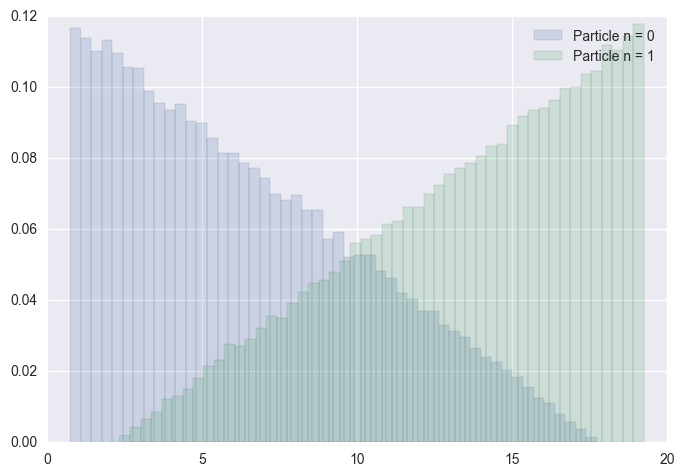

In [476]:
N, n, L, sigma = 10**5, 2, 20, 0.75
dat= np.zeros((N, n))
for k in range(N):
    dat[k] = cleverSampling(n, L, sigma)

for l in range(n):
    plt.hist(dat[:,l], bins = 50, normed = True, alpha = 0.2, label = 'Particle n = ' + str(l))

plt.legend() ; plt.show()

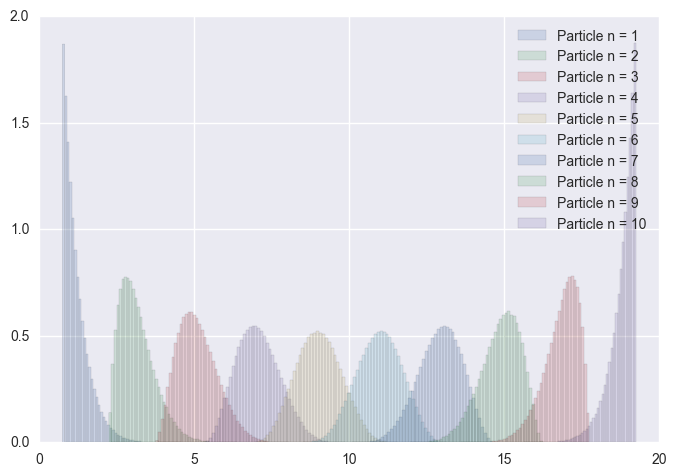

In [486]:
N, n, L, sigma = 10**6, 10, 20, 0.75
dat= np.zeros((N, n))
for k in range(N):
    dat[k] = cleverSampling(n, L, sigma)

a = [0 for i in range(n)]

for l in range(n):
    a[l], bins, normed = plt.hist(dat[:,l], 50, normed = True, alpha = 0.2, label = 'Particle n = ' + str(l+1))

plt.legend() ; plt.show()

In the two graphs above, we actually obtain the same result than before, but it is hidden. Indeed, just before the mapping step, we sort the list of the positions to get an ordered list. But in the first case, where we accept or reject a distribution of positions, the two particles were indistinguishable, which is not the case here.

Let us consider two balls, labeled 1 and 2, at respective positions $x_{1}$ and $x_{2}$, with $x_{1} < x_{2}$ (no overlap). Now, we take a third ball, labeled 3. There are three cases :
- If $x_{3} > x_{2} > x_{1}$, then the three balls keep they labelling.
- Else if $x_{2} > x_{3} > x_{1}$, then ball 1 stays ball 1 : $1 \rightarrow 1$, but $2 \rightarrow 3$, and $3 \rightarrow 2$, so that we now have $x_{1} < x_{2} < x_{3}$.
- Else, $x_{2} > x_{1} > x_{3}$, we also exchange the labels : $1 \rightarrow 2$, $2 \rightarrow 3$ and $3 \rightarrow 1$

This means that whatever could be the initial distribution, the sorting imposes some kind of "confining" to the marginal distribution of a ball. Indeed, each ball has a defined label depending on its position : ball $i$ will always be between $i-1$ and $i+1$. But because of this sorting procedure, the minimal and maximal positions that ball $i$ can reach are predefined : the minimum position of ball $i$ is when all the balls between $[1, i-1]$ are sticked to the left (with no overlap) so it is $$x_{\min}^{(i)} = \sigma + 2\sigma \times ... \times 2\sigma + \sigma = 2\sigma + (2\sigma)^{i-1}$$
and the maximal position of ball $i$ is
$$x_{\max}^{(i)} = (L - \sigma) - 2\sigma \times ... \times 2\sigma - \sigma = L - 2\sigma - (2\sigma)^{n-i} $$

## 5. Computing the distribution

Given the partition function $Z=Z_{n,L}$, the probability of having a given configuration $(x_1,x_2..,x_n)$ is the following

$$\begin{equation*}
P(x_1,x_2..,x_n)= \frac{\textbf{1}_c (x_1,x_2..,x_n)}{Z}
\end{equation*}$$

where $\textbf{1}_c$ is the indicator function of configurations, equal to $1$ for possible configurations and $0$ otherwise.

We want to compute the probability that there is a particle at $x$. This amounts to computing the number of configurations where there is a particle at $x$. Let's consider the following integral

\begin{equation*}
 \int_0^L dx_1dx_2...dx_n \textbf{1}_c (x_1,x_2..,x_n) \left( \delta(x-x_1) + \delta(x-x_2) ... + \delta(x-x_n) \right)
\end{equation*}

We claim that the previous integral is proportional to the probability density that there is a particle at $x$. This is true because for a given configuration $(x_1...x_n)$ we have two possibilities:
- The configuration is impossible (overlap or particle at edge) in which case the indicator function is equal to $0$ and the configuration is not counted.
- The configuration is possible, the indicator function is equal to $1$. We have here two cases: either $x=x_k$ for some index $k$ in which case the configuration is counted, or $x$ is different from all the $x_k$, in which case none of the Dirac masses is "equal to $1$" and the configuration is not counted. Note that since the configuration is possible, these are the two only cases (we can't have two or more particles at $x$).

Integrating each Dirac mass over the corresponding variable, and using the fact that all the $x_k$ play a symmetric role in the indicator function, we get to the following function

\begin{equation*}
f(x)= n \int_0^L dx_2...dx_n \textbf{1}_c (x,x_2..,x_n)
\end{equation*}

This is the density of having a particle at $x$ (up to a renormalization).We have then to compute an integral of dimension $n-1$, which can be done easily via MC sampling. The procedure is the following: for each point $x$, generate a valid configuration of $n-1$ particles $(x_2,x_3..x_n)$, then count $1$ if $(x,x_2,x_3..x_n)$ is a valid configuration of $n$ particles and $0$ otherwise. For computation efficiency, we will do the procedure in the opposite order: generate a valid configuration of $n-1$ particles, then count $1$ for positions $x$ that will form valid configurations of $n$ particles and $0$ for the other (in other words each $n-1$ particles configuration is used for all $x$, instead of generating many configurations for each $x$.

In [376]:
def test_config(x,X,sigma,L):
    X1 = np.repeat(np.array([X]),len(x),axis=0)
    test = np.sum(np.abs(X1.T - x) < sigma , axis = 0)
    test = test + (x < sigma) + (x > L - sigma)
    return (  test == 0  )

In [377]:
L = 20
sigma = 0.75
X = cleverSampling(9,L,sigma)
X

array([  0.94149008,   2.85648265,   4.71592669,   6.7012487 ,
         9.39840457,  11.52044555,  13.07300345,  15.47783206,  18.45314277])

In [378]:
x = np.linspace(0,20,100)

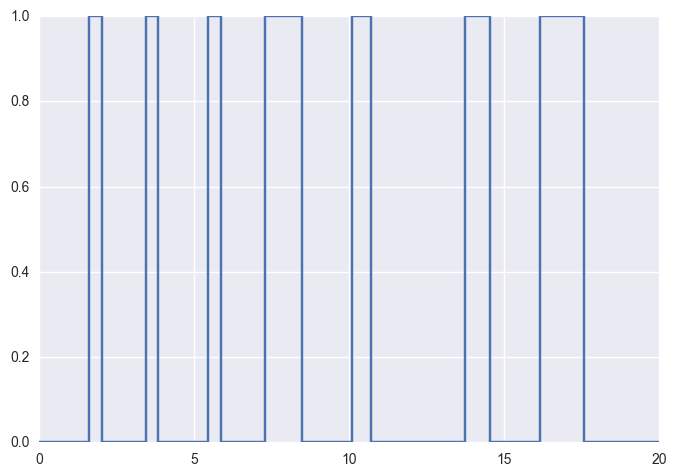

In [379]:
tests = test_config(x,X,0.75,L)
plt.step(x,tests)
plt.show()

In [493]:
L = 20
sigma = 0.75
n = 8
x = np.linspace(0,L,100)
density = np.zeros(len(x))
iters = 100000
for i in range(iters):
    X = cleverSampling(n-1,L,sigma)
    l = test_config(x,X,sigma,L)
    density = density + l
density = density / np.sum(density)

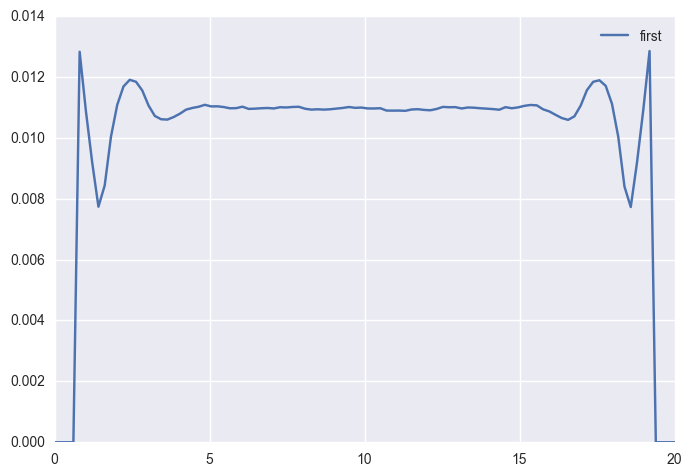

In [494]:
plt.plot(x,density,label='first')
plt.legend(loc="best")
plt.show()

In [420]:
def test_config2(X,sigma,L):
    test1 = np.sum(X < sigma) + np.sum(X > L - sigma)
    X1 = np.expand_dims(X,axis = 1)
    distances = cdist(X1,X1) + np.diag(3*sigma*np.ones(len(X)))
    test2 = np.sum(distances < 2*sigma)
    return(test1 + test2 == 0)

In [ ]:
L = 20
sigma = 0.75
n = 6
x = np.linspace(0,L,100)
density1 = np.zeros(len(x))
iters = 100000
for i in range(iters):
    X = random(size = n-1)*(L-2*sigma) + sigma
    l = np.array([test_config2(np.append(X,xi),sigma,L) for xi in x])
    density1 = density1 + l
    if i%10000 == 0:
        print(i)

In [453]:
density1

array([    0.,     0.,     0.,     0.,  5360.,  4888.,  4403.,  3987.,
        3654.,  3309.,  2976.,  2684.,  2798.,  2936.,  3047.,  3138.,
        3183.,  3193.,  3173.,  3136.,  3160.,  3152.,  3125.,  3059.,
        3053.,  3118.,  3121.,  3093.,  3120.,  3150.,  3115.,  3093.,
        3104.,  3119.,  3096.,  3105.,  3093.,  3091.,  3100.,  3100.,
        3090.,  3104.,  3082.,  3104.,  3104.,  3117.,  3107.,  3109.,
        3145.,  3129.,  3119.,  3120.,  3085.,  3056.,  3048.,  3072.,
        3099.,  3070.,  3054.,  3090.,  3050.,  3080.,  3129.,  3132.,
        3163.,  3174.,  3192.,  3216.,  3243.,  3259.,  3223.,  3224.,
        3225.,  3241.,  3210.,  3186.,  3179.,  3236.,  3221.,  3219.,
        3242.,  3270.,  3252.,  3233.,  3203.,  3170.,  3060.,  2868.,
        2708.,  3004.,  3332.,  3679.,  4027.,  4446.,  4864.,  5322.,
           0.,     0.,     0.,     0.])

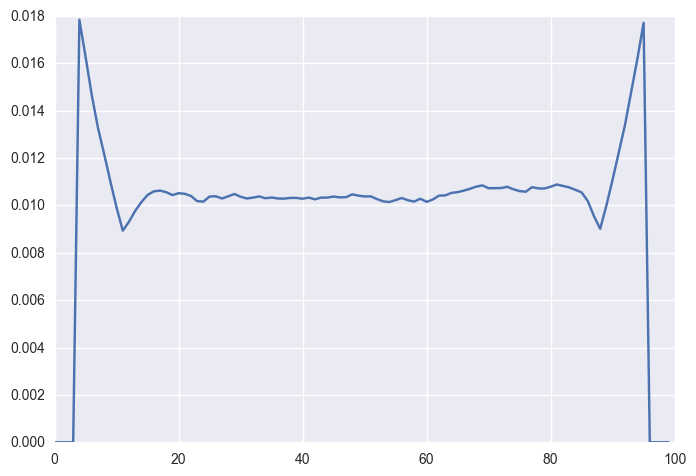

In [454]:
plt.plot(density1/np.sum(density1))
plt.show()

In [488]:
data = dat.ravel()

In [489]:
len(data)

10000000

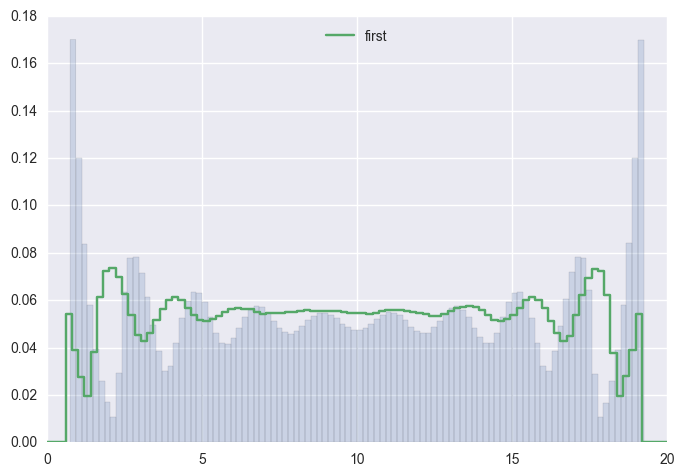

In [490]:
plt.hist(data, 100, normed = True, alpha = 0.2)
plt.step(x,density/(x[1]-x[0]),label='first')
plt.legend(loc="best")
plt.show()

In [413]:
Y = np.expand_dims(y,axis=1)
Y

array([[ 14.5],
       [ 15.5]])

In [414]:
cdist(Y,Y)

array([[ 0.,  1.],
       [ 1.,  0.]])

In [418]:
np.diag(0.35*np.ones(5))

array([[ 0.35,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.35,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.35,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.35,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.35]])

In [472]:
np.array(range(1,11))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])